# 6.1

## (a)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd


def generate_dataset(n_samples, dimension, n_class):

    # Generate a DataFrame with 10 columns of binary data
    data = np.random.randint(2, size=(n_samples, dimension))

    # Generate a binary label column
    labels = np.random.randint(n_class, size=(n_samples, 1))

    # Combine data and labels into a DataFrame
    df = pd.DataFrame(
        data, columns=[f'Feature_{i}' for i in range(1, dimension+1)])
    df['label'] = labels
    return df


def count_accuracy(y_pred, y_train):
    count = 0
    # print(len(y_pred))
    # print(len(y_train))
    for i in range(len(y_pred)):

        if y_pred[i] == y_train[i]:
            count += 1
    return count


dimensions = [2, 4, 8]
experiment = 100
for d in dimensions:
    correct_points = 0
    for k in range(experiment):
        dataset = generate_dataset(pow(2, d), d, 2)
        X = dataset.iloc[:, :-1]
        Y = dataset['label']
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X, Y)
        y_pred = knn.predict(X)
        # accuracy = metrics.accuracy_score(Y, y_pred)
        correct_points += count_accuracy(y_pred, Y)
    print("d=", d, "Avg. req. points for memorization n_avg=",
          correct_points/experiment, "n/d=", Y.shape[0]/(correct_points/experiment))
    # print(y_pred)
    # print(Y.shape[0],correct_points)

d= 2 Avg. req. points for memorization n_avg= 3.35 n/d= 1.1940298507462686
d= 4 Avg. req. points for memorization n_avg= 12.91 n/d= 1.2393493415956622
d= 8 Avg. req. points for memorization n_avg= 209.36 n/d= 1.222774168895682


## (b)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd


def generate_dataset(n_samples, dimension, n_class):

    # Generate a DataFrame with 10 columns of binary data
    data = np.random.randint(2, size=(n_samples, dimension))

    # Generate a binary label column
    labels = np.random.randint(n_class, size=(n_samples, 1))

    # Combine data and labels into a DataFrame
    df = pd.DataFrame(
        data, columns=[f'Feature_{i}' for i in range(1, dimension+1)])
    df['label'] = labels
    return df


def count_accuracy(y_pred, y_train):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_train[i]:
            count += 1
    return count


dimensions = [2, 4, 8]
experiment = 100
for d in dimensions:
    correct_points = 0
    for k in range(experiment):
        dataset = generate_dataset(pow(2, d), d, 4)
        X = dataset.iloc[:, :-1]
        Y = dataset['label']
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X, Y)
        y_pred = knn.predict(X)
        accuracy = metrics.accuracy_score(Y, y_pred)
        correct_points += count_accuracy(y_pred, Y)
    print("d=", d, "Avg. req. points for memorization n_avg=",
          correct_points/experiment, "n/d=", Y.shape[0]/(correct_points/experiment))

d= 2 Avg. req. points for memorization n_avg= 3.06 n/d= 1.3071895424836601
d= 4 Avg. req. points for memorization n_avg= 11.57 n/d= 1.382886776145203
d= 8 Avg. req. points for memorization n_avg= 185.54 n/d= 1.3797563867629623


# 6.2

## (a)


Accuracy:  0.9239766081871345


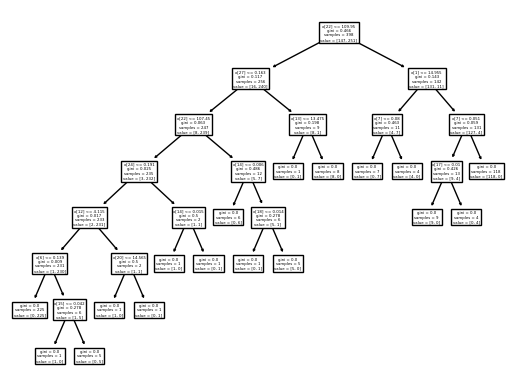

In [5]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np


dataset = load_breast_cancer()

X = dataset.data
Y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

y_test_predicted = clf1.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_test_predicted)


tree.plot_tree(clf1)

print("Accuracy: ", accuracy)

Strategy: Decision tree from scikit learn. \
The number of resulting conditional clauses is 14. The accuracy is 91.8%.

Accuracy:  0.9239766081871345


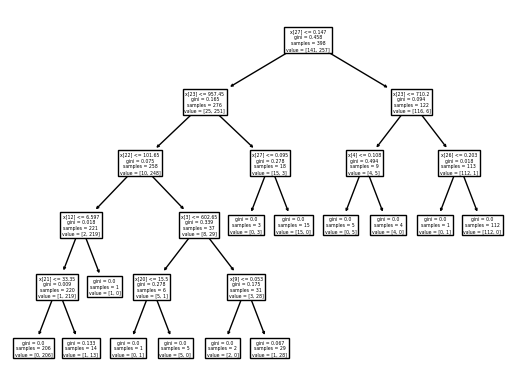

In [6]:
clf2 = tree.DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(X_train, y_train)

tree.plot_tree(clf2)

y_test_predicted = clf2.predict(X_test)
accuracy2 = metrics.accuracy_score(y_test, y_test_predicted)

print("Accuracy: ", accuracy2)

Strategy: Decision tree from scikit learn with maxium depth of 5 \
The number of resulting conditional clauses is 11. The accuracy is 92.3%.

## (b)

Accuracy:  0.670995670995671


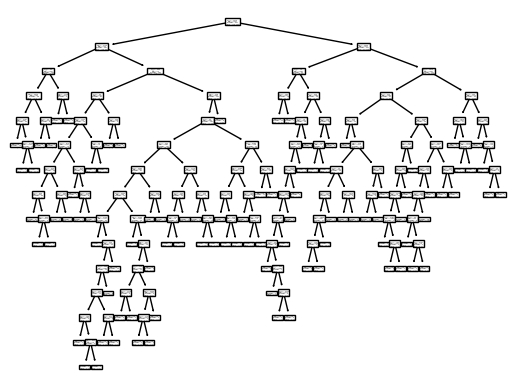

In [15]:
df = pd.read_csv('diabetes.csv')

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(X_train, y_train)

tree.plot_tree(clf3)

y_test_predicted = clf3.predict(X_test)
accuracy3 = metrics.accuracy_score(y_test, y_test_predicted)

print("Accuracy: ", accuracy3)

Accuracy:  0.7272727272727273


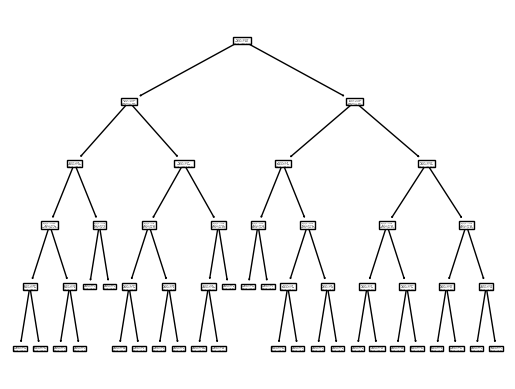

In [16]:
clf4 = tree.DecisionTreeClassifier(max_depth=5)
clf4 = clf4.fit(X_train, y_train)

tree.plot_tree(clf4)

y_test_predicted = clf4.predict(X_test)
accuracy4 = metrics.accuracy_score(y_test, y_test_predicted)

print("Accuracy: ", accuracy4)

Choosing Pima Indians Diabetes Database as dataset caused the accuracy to decrease for the same decision tree strategies.

## (c)

In [30]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np


def generate_dataset(n_samples, dimension, n_class):

    # Generate a DataFrame with 10 columns of binary data
    data = np.random.randint(2, size=(n_samples, dimension))

    # Generate a binary label column
    labels = np.random.randint(n_class, size=(n_samples, 1))

    # Combine data and labels into a DataFrame
    df = pd.DataFrame(
        data, columns=[f'Feature_{i}' for i in range(1, dimension+1)])
    df['label'] = labels
    return df


n_samples = [10, 100, 1000]
dimension = [4, 8, 16]
accuracy_first = []
accuracy_second = []
for i in range(3):

    df = generate_dataset(n_samples[i], dimension[i], 2)
    X = df.iloc[:, :-1]
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    clf5 = tree.DecisionTreeClassifier()
    clf5 = clf5.fit(X_train, y_train)

    y_test_predicted = clf5.predict(X_test)
    accuracy_first.append(metrics.accuracy_score(y_test, y_test_predicted))

    clf6 = tree.DecisionTreeClassifier(max_depth=5)
    clf6 = clf6.fit(X_train, y_train)

    y_test_predicted = clf6.predict(X_test)
    accuracy_second.append(metrics.accuracy_score(y_test, y_test_predicted))

print("Strategy: decision tree from scikit learn")
for i in range(3):
    print("n=", n_samples[i], " d=", dimension[i],
          " Accuracy: ", accuracy_first[i])
print("\nStrategy: decision tree from scikit learn with maximum depth=5")
for i in range(3):
    print("n=", n_samples[i], " d=", dimension[i],
          " Accuracy: ", accuracy_second[i])

Strategy: decision tree from scikit learn
n= 10  d= 4  Accuracy:  0.6666666666666666
n= 100  d= 8  Accuracy:  0.4
n= 1000  d= 16  Accuracy:  0.5066666666666667

Strategy: decision tree from scikit learn with maximum depth=5
n= 10  d= 4  Accuracy:  0.6666666666666666
n= 100  d= 8  Accuracy:  0.5333333333333333
n= 1000  d= 16  Accuracy:  0.5566666666666666


# 6.3

## (a)

In [47]:
import random
import string
import sys
# Define the length of the string
length_of_string = 1000

# Create a random string of specified length using ascii letters and digits
random_string = ''.join(random.choices(
    string.ascii_lowercase, k=length_of_string))


def rle_encode(data):
    encoding = ''
    prev_char = ''
    count = 1

    if not data:
        return ''

    for char in data:
        if char != prev_char:
            if prev_char:
                if count > 1:
                    encoding += str(count) + prev_char
                else:
                    encoding += prev_char
            count = 1
            prev_char = char
        else:
            count += 1
    else:
        if count > 1:
            encoding += str(count) + prev_char
        else:
            encoding += prev_char
        return encoding


# Test the RLE function with a string
encoded_string = rle_encode(random_string)
compression_rate = 1-len(encoded_string)/len(random_string)
print("Size of the original string:", len(random_string))
print("Size of the compressed string:", len(encoded_string))
print("Compression rate:", compression_rate)

Size of the original string: 1000
Size of the compressed string: 998
Compression rate: 0.0020000000000000018


## (b)
The expected compression ratio in (a) is 0 because the compression algorithm only works if there are more than 3 consecutive repetitive characters. Since the string is randomly generated, the chance of having consecutive repetitive characters is really low.

# 8.1

## (a)
4x3+min(4x3,3)+min(4,3)=18

## (b)
3+4+4=11

## (c)
Network (a) can memorize 18 rows, Network (b) can memorize 11 rows.

## (d)
For 4 classes classification, we need 2 bits to save the result. Network (a) can memorize 18/2=9 rows, network (b) can memorize 11/2=5 rows.

# 8.2

![](8-2.png)

# 8.4

## (a)
Assume eyes perceive 36,000 bits of information each hour. I am currently 24 years old. The hour I have lived is 24*365*24=210,240. The information I have is 210,240*36,000=7,568,640,000 bits.
 \
 \
Assume we can perceive 150kb of audio information per second. That is 9000kb in one minutes and 540,000kb in one hour. I am 24 years old. The total information I have perceived in my life is 540,000*24(hours)*365(days)*24(years)=113,529,600,000,000 bits. \
\
\
There are 884421 words in Shakespeare’s work. The average word length in English is 4.7. Each character has around 1.6 bit of information. The work of Shakespeare’s work has in total of 6.6*10^6 bits of information.
\
\
Our brain has capacity of 10^11*1000*2 =2*10^14 bits, which is smaller than the information we have perceived. My brain is full!

## (b)
```
function memorize((data, labels))
	thresholds ← 0 
	for all rows do 
		table[row]← (sum(data[I][row]),label[row]) 
        end for 
	sortedtable ← sort(table, key = column 0) 
	class ←sortedtable[0][1]
	
	for row in rows[1:]  
		if not sortedtable[row][1]==class then 
			class ←sortedtable[i][1] 
			thresholds ← thresholds +1 
		end if 
	end for
	minthreshs ← log2(thresholds + 1) 
	mec ←(minthreshs ∗ (d +1)) + minthreshs 
end function: mec 
```

## (c)
``` 
function memorize(data, labels, epsilon)
	thresholds ← 0 
	for all rows do 
		table[row]← (sum(data[row][d]),label[row]) 
	end for 
	sortedtable ← sort(table, key = column 0) 
	value ←sortedtable[0][1]
	
	
	for all row in rows[1:] do 
		if abs(sortedtable[row][1]-value)<epsilon then 
			value ←sortedtable[i][1] 
			thresholds ← thresholds +1 
		end if 
	end for
	minthreshs ← log2(thresholds + 1) 
	mec ←(minthreshs ∗ (d +1)) + minthreshs 
end function: mec 
```

# 9.1

In [31]:
# calculate the information from MNIST dataset
import torch
from torch import nn
import torchvision as TV
from torchvision import models
import numpy as np


train_data = TV.datasets.MNIST("MNIST/", train=True, transform=None,
                               target_transform=None, download=True)  # 下載並匯入MNIST訓練資料
test_data = TV.datasets.MNIST("MNIST/", train=False, transform=None,
                              target_transform=None, download=True)  # 下載並匯入MNIST測試資料


def prepare_images(xt):  # 對圖片進行預處理，以符合PyTorch的格式需求
    out = torch.zeros(xt.shape)
    for i in range(xt.shape[0]):
        img = xt[i].unsqueeze(dim=0)  # 加入批次軸
        out[i] = img
    return out


xt = train_data.data.detach()
xt = prepare_images(xt).unsqueeze(dim=1)
yt = train_data.train_labels.detach()

information = 0
for class_i in range(10):
    occurrences = torch.sum(yt == class_i).item()
    information += -(occurrences*np.log2(occurrences/yt.shape[0]))


print("Information:", information)

Information: 199192.25560531128


/Users/sabrina/anaconda3/envs/cs294/lib/python3.12/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [37]:
import torch
from torch import nn
import torchvision as TV
from torchvision import models


class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.lin1 = nn.Linear(28*28, 256)
        self.lin2 = nn.Linear(256, 128)
        self.out = nn.Linear(128, 10)  # 模型的最後一層為線性層，用來處理CNN扁平化後的輸出

    def forward(self, x):
        x = x.flatten(start_dim=1)  # 扁平化
        x = self.lin1(x)
        x = nn.functional.relu(x)  # 選用ReLU為激活函數
        x = self.lin2(x)
        x = nn.functional.relu(x)
        x = self.out(x)
        x = nn.functional.log_softmax(x, dim=1)  # 使用log_softmax( )，以機率的形式進行分類
        return x


def prepare_images(xt):  # 對圖片進行預處理，以符合PyTorch的格式需求
    out = torch.zeros(xt.shape)
    for i in range(xt.shape[0]):
        img = xt[i].unsqueeze(dim=0)  # 加入批次軸
        out[i] = img
    return out


model = CNN()  # 建立CNN模組的實例
epochs = 100  # 定義訓練迴圈
batch_size = 500  # 定義批次大小
lr = 1e-3
opt = torch.optim.Adam(params=model.parameters(), lr=lr)
lossfn = nn.NLLLoss()

losses1 = []
acc_CNN1 = []

for i in range(epochs):

    # print('Current training epoch: ',i) #顯示當前訓練進度
    opt.zero_grad()
    batch_ids_CNN = np.random.randint(
        0, 60000, size=batch_size)  # 隨機從訓練集中選取樣本，組成訓練批次
    xt = train_data.data[batch_ids_CNN].detach()  # 產生訓練批次
    xt = prepare_images(xt).unsqueeze(dim=1)  # 加入通道軸
    yt = train_data.train_labels[batch_ids_CNN].detach()  # 取得正確的標籤資訊
    pred = model(xt)
    pred_labels = torch.argmax(pred, dim=1)  # 找出擁有最大機率值的類別，即為模型的預測結果
    acc_ = 100.0 * (pred_labels == yt).sum() / batch_size  # 計算預測準確率
    # print('Current training accuracy: ', acc_.item()) #顯示該訓練迴圈的預測準確率
    acc_CNN1.append(acc_)
    loss = lossfn(pred, yt)  # 計算損失
    # print('Current training loss: ', loss.item()) #顯示該訓練迴圈的損失
    losses1.append(loss)
    loss.backward()
    opt.step()

acc_CNN1 = np.array(acc_CNN1)  # 將每一訓練迴圈的預測準確率存進陣列，以便稍後進行視覺化
losses1 = np.array([loss.detach().numpy()
                    for loss in losses1])  # 將每一訓練迴圈的損失存進陣列，以便稍後進行視覺化

mec = 28*28*256+256+128+10

print("MEC:", mec)


def test_acc(model):
    acc = 0.
    xt = test_data.data.detach()
    xt = prepare_images(xt).unsqueeze(dim=1)
    yt = test_data.targets.detach()
    preds = model(xt)
    pred_ind = torch.argmax(preds.detach(), dim=1)
    acc = (pred_ind == yt).sum().float() / 10000
    return acc, xt, yt


acc, xt, yt = test_acc(model)
print('Testing accuracy = ', (acc*100).item())

MEC: 201098
Testing accuracy =  94.29000091552734


In [42]:
import torch
from torch import nn
import torchvision as TV
from torchvision import models


class CNN2(torch.nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()

        self.lin1 = nn.Linear(28*28, 128)
        self.out = nn.Linear(128, 10)  # 模型的最後一層為線性層，用來處理CNN扁平化後的輸出

    def forward(self, x):
        x = x.flatten(start_dim=1)  # 扁平化
        x = self.lin1(x)
        x = nn.functional.relu(x)
        x = self.out(x)
        x = nn.functional.log_softmax(x, dim=1)  # 使用log_softmax( )，以機率的形式進行分類
        return x


def prepare_images(xt):  # 對圖片進行預處理，以符合PyTorch的格式需求
    out = torch.zeros(xt.shape)
    for i in range(xt.shape[0]):
        img = xt[i].unsqueeze(dim=0)  # 加入批次軸
        out[i] = img
    return out


model2 = CNN2()  # 建立CNN模組的實例
epochs = 100  # 定義訓練迴圈
batch_size = 500  # 定義批次大小
lr = 1e-3
opt = torch.optim.Adam(params=model2.parameters(), lr=lr)
lossfn = nn.NLLLoss()

losses2 = []
acc_CNN2 = []

for i in range(epochs):

    # print('Current training epoch: ',i) #顯示當前訓練進度
    opt.zero_grad()
    batch_ids_CNN = np.random.randint(
        0, 60000, size=batch_size)  # 隨機從訓練集中選取樣本，組成訓練批次
    xt = train_data.data[batch_ids_CNN].detach()  # 產生訓練批次
    xt = prepare_images(xt).unsqueeze(dim=1)  # 加入通道軸
    yt = train_data.train_labels[batch_ids_CNN].detach()  # 取得正確的標籤資訊
    pred = model2(xt)
    pred_labels = torch.argmax(pred, dim=1)  # 找出擁有最大機率值的類別，即為模型的預測結果
    acc_ = 100.0 * (pred_labels == yt).sum() / batch_size  # 計算預測準確率
    # print('Current training accuracy: ', acc_.item()) #顯示該訓練迴圈的預測準確率
    acc_CNN2.append(acc_)
    loss = lossfn(pred, yt)  # 計算損失
    # print('Current training loss: ', loss.item()) #顯示該訓練迴圈的損失
    losses2.append(loss)
    loss.backward()
    opt.step()

acc_CNN2 = np.array(acc_CNN2)  # 將每一訓練迴圈的預測準確率存進陣列，以便稍後進行視覺化
losses2 = np.array([loss.detach().numpy()
                    for loss in losses2])  # 將每一訓練迴圈的損失存進陣列，以便稍後進行視覺化

mec = 28*28*128+128+10

print("MEC:", mec)


acc2, xt2, yt2 = test_acc(model2)
print('Testing accuracy = ', (acc2*100).item())

MEC: 100490
Testing accuracy =  91.04000091552734


In [45]:
import torch
from torch import nn
import torchvision as TV
from torchvision import models


class CNN3(torch.nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()

        self.lin1 = nn.Linear(28*28, 256)
        self.out = nn.Linear(256, 10)  # 模型的最後一層為線性層，用來處理CNN扁平化後的輸出

    def forward(self, x):
        x = x.flatten(start_dim=1)  # 扁平化
        x = self.lin1(x)
        x = nn.functional.relu(x)
        x = self.out(x)
        x = nn.functional.log_softmax(x, dim=1)  # 使用log_softmax( )，以機率的形式進行分類
        return x


def prepare_images(xt):  # 對圖片進行預處理，以符合PyTorch的格式需求
    out = torch.zeros(xt.shape)
    for i in range(xt.shape[0]):
        img = xt[i].unsqueeze(dim=0)  # 加入批次軸
        out[i] = img
    return out


model3 = CNN3()  # 建立CNN模組的實例
epochs = 100  # 定義訓練迴圈
batch_size = 500  # 定義批次大小
lr = 1e-3
opt = torch.optim.Adam(params=model3.parameters(), lr=lr)
lossfn = nn.NLLLoss()

losses3 = []
acc_CNN3 = []


for i in range(epochs):

    # print('Current training epoch: ',i) #顯示當前訓練進度
    opt.zero_grad()
    batch_ids_CNN = np.random.randint(
        0, 60000, size=batch_size)  # 隨機從訓練集中選取樣本，組成訓練批次
    xt = train_data.data[batch_ids_CNN].detach()  # 產生訓練批次
    xt = prepare_images(xt).unsqueeze(dim=1)  # 加入通道軸
    yt = train_data.train_labels[batch_ids_CNN].detach()  # 取得正確的標籤資訊
    pred = model3(xt)
    pred_labels = torch.argmax(pred, dim=1)  # 找出擁有最大機率值的類別，即為模型的預測結果
    acc_ = 100.0 * (pred_labels == yt).sum() / batch_size  # 計算預測準確率
    # print('Current training accuracy: ', acc_.item()) #顯示該訓練迴圈的預測準確率
    acc_CNN3.append(acc_)
    loss = lossfn(pred, yt)  # 計算損失
    # print('Current training loss: ', loss.item()) #顯示該訓練迴圈的損失
    losses3.append(loss)
    loss.backward()
    opt.step()

acc_CNN3 = np.array(acc_CNN3)  # 將每一訓練迴圈的預測準確率存進陣列，以便稍後進行視覺化
losses3 = np.array([loss.detach().numpy()
                    for loss in losses3])  # 將每一訓練迴圈的損失存進陣列，以便稍後進行視覺化

mec = 28*28*256+256+10

print("MEC:", mec)

acc3, xt3, yt3 = test_acc(model3)
print('Testing accuracy = ', (acc3*100).item())

MEC: 200970
Testing accuracy =  93.04000091552734


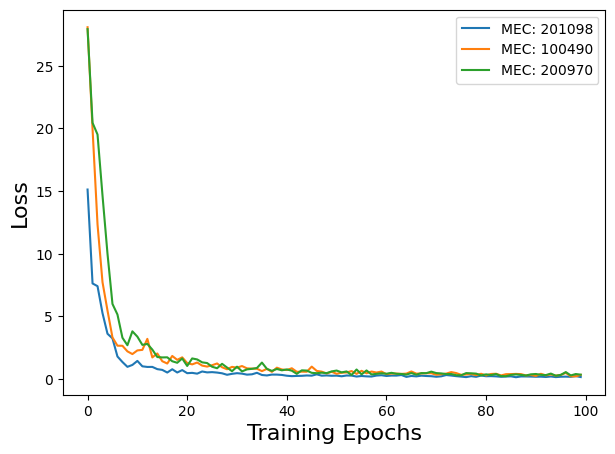

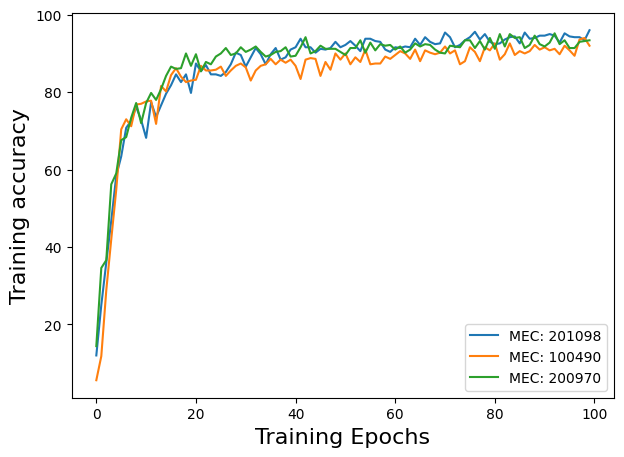

In [46]:
plt.figure(figsize=(7, 5))
plt.xlabel("Training Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.plot(losses1, label="MEC: 201098")
plt.plot(losses2, label="MEC: 100490")
plt.plot(losses3, label="MEC: 200970")
plt.legend()
plt.figure(figsize=(7, 5))
plt.xlabel("Training Epochs", fontsize=16)
plt.ylabel("Training accuracy", fontsize=16)
plt.plot(acc_CNN1, label="MEC: 201098")
plt.plot(acc_CNN2, label="MEC: 100490")
plt.plot(acc_CNN3, label="MEC: 200970")
plt.legend()
plt.show()

Reducing the parameters in the network decreased the training accuracy.